**Parameters offered by UNET trace**
1. Drop count - the number of packets dropped since warmup
2. Enqueue count - the number of packets queued since warmup (In vast majority of cases, this corresponds to Tx count)
3. Load - the normalized actual network load
4. Mean delay - the mean delay between queuing and reception
5. Offered load - the normalized offered network load (In vast majority of cases, this corresponds to Load)
6. Rx count - the number of packets received since warmup
7. Throughput - the normalized network throughput. Calculated as time nodes are busy received successful frames/time experienced by all nodes
   (As such, adding nodes who do not receive data decreases overall throughput, as these nodes expereience large durations receiving nothing)
8. Tx count - the number of packets sent since warmup

**Parameters calculated from statistics**
1. Loss - drop count/ tx count
2. Retransmitted packets - If a transmission method uses reliabile delivery, the dropped packets are the retransmitted packets



In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum, auto


In [37]:
class Mac(Enum):
    ALOHA = 0
    CSMA = auto()
    SFAMA = auto()
    
    
class Scenario(Enum):
    BaseGridScenario = 0
    OffsetGridScenario = auto()
    HighQuantityScenario = auto()
    LowQuantityScenario = auto()
    ClusterScenario = auto()
    
    
class Column(Enum):
    Load = 0
    DropCount = auto()
    EnqueCount = auto()
    SimLoad = auto()
    MeanDelay = auto()
    OfferedLoad = auto()
    RxCount = auto()
    Throughput = auto()
    TxCount = auto()
    Loss = auto()

print(list(Mac))
print(list(Scenario))

col_names = [c.name for c in Column]


[<Mac.ALOHA: 0>, <Mac.CSMA: 1>, <Mac.SFAMA: 2>]
[<Scenario.BaseGridScenario: 0>, <Scenario.OffsetGridScenario: 1>, <Scenario.HighQuantityScenario: 2>, <Scenario.LowQuantityScenario: 3>, <Scenario.ClusterScenario: 4>]


In [40]:
results = []
for m in Mac:
    for s in Scenario:
        name = m.name + "_" + s.name
        l = []
        
        try:
            r = pd.read_csv('results/' + name + '.csv',names=col_names, header=0)
            # print(len(r))
            l.append(r)
        except:
            print(f"File {name} does not exist")
        
    results.append(l)


print(len(results))
print(results[0])


5
5
4
4
5
5
5
0
5
5
5
5
5
5
5
3
[   Load  DropCount  EnqueCount  SimLoad  MeanDelay  OfferedLoad  RxCount  \
0   0.2      623.0      1365.0    0.159      0.548        0.159    742.0   
1   0.4     1568.0      2298.0    0.267      0.546        0.267    728.0   
2   0.6     2454.0      3161.0    0.367      0.541        0.369    706.0   
3   0.8     3032.0      3637.0    0.422      0.543        0.424    604.0   
4   1.0     3616.0      4159.0    0.484      0.529        0.485    543.0   

   Throughput  TxCount   Loss  
0       0.087   1364.0  0.457  
1       0.085   2296.0  0.683  
2       0.082   3147.0  0.780  
3       0.071   3615.0  0.839  
4       0.063   4146.0  0.872  ]


In [22]:
print(results[Mac.ALOHA.value][Scenario.BaseGridScenario.value])

   Load  DropCount  EnqueCount  SimLoad  MeanDelay  OfferedLoad  RxCount  \
0   0.2      623.0      1365.0    0.159      0.548        0.159    742.0   
1   0.4     1568.0      2298.0    0.267      0.546        0.267    728.0   
2   0.6     2454.0      3161.0    0.367      0.541        0.369    706.0   
3   0.8     3032.0      3637.0    0.422      0.543        0.424    604.0   
4   1.0     3616.0      4159.0    0.484      0.529        0.485    543.0   

   Throughput  TxCount   Loss  
0       0.087   1364.0  0.457  
1       0.085   2296.0  0.683  
2       0.082   3147.0  0.780  
3       0.071   3615.0  0.839  
4       0.063   4146.0  0.872  


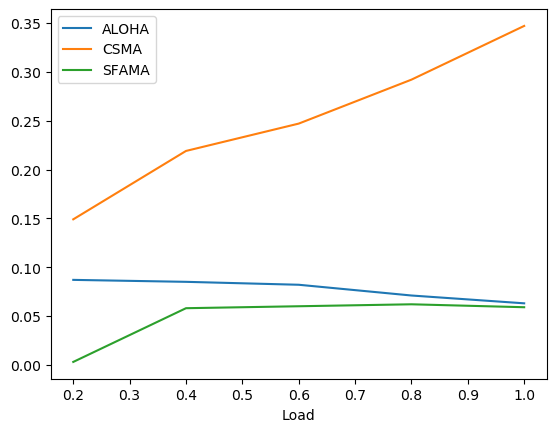

In [27]:
basegrid_ax = results[Mac.ALOHA.value][Scenario.BaseGridScenario.value].plot(x=Column.Load.name, y=Column.Throughput.name)
results[Mac.CSMA.value][Scenario.BaseGridScenario.value].plot(ax=basegrid_ax,x=Column.Load.name, y=Column.Throughput.name)
results[Mac.SFAMA.value][Scenario.BaseGridScenario.value].plot(ax=basegrid_ax,x=Column.Load.name, y=Column.Throughput.name)
basegrid_ax.legend([Mac.ALOHA.name, Mac.CSMA.name, Mac.SFAMA.name])


3
1


In [28]:
offset_ax = results[Mac.ALOHA.value][Scenario.OffsetGridScenario.value].plot(x=Column.Load.name, y=Column.Throughput.name)
results[Mac.CSMA.value][Scenario.OffsetGridScenario.value].plot(ax=offset_ax,x=Column.Load.name, y=Column.Throughput.name)
results[Mac.SFAMA.value][Scenario.OffsetGridScenario.value].plot(ax=offset_ax,x=Column.Load.name, y=Column.Throughput.name)
offset_ax.legend([Mac.ALOHA.name, Mac.CSMA.name, Mac.SFAMA.name])

IndexError: list index out of range